# WEEK 3 TUTORIAL


In [1]:
print("Data Aggregation: ")

Data Aggregation: 


In [12]:
import os
import pandas as pd

In [13]:
from matplotlib import pyplot as plt

In [33]:
os.chdir("C:\\Users\\Nicol Foo\\OneDrive\\Desktop\\School stuff\\MONASH\\FIT1043 - 2022 S2")
os.getcwd()

'C:\\Users\\Nicol Foo\\OneDrive\\Desktop\\School stuff\\MONASH\\FIT1043 - 2022 S2'

In [37]:
titanic = pd.read_csv('titanic.csv')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [38]:
fun = {'who': 'count','age':'mean'}

In [39]:
groupbyClass = titanic.groupby('class').agg(fun)

In [40]:
groupbyClass

,who,age
class,,
First,216,38.233441
Second,184,29.877630
Third,491,25.140620


In [41]:
groupbyClass = titanic.groupby('class').agg(fun)
groupbyClass.rename(
columns={"who":"passengers", "age":"average age"},
inplace = True
)
groupbyClass = groupbyClass.reset_index()
groupbyClass


,class,passengers,average age
0,First,216,38.233441
1,Second,184,29.877630
2,Third,491,25.140620


In [45]:
fun2 = {'who':'count','age':{'mean', 'max', 'min'}}
groupbyClass2 = titanic.groupby('class').agg(fun2)
# It’s incomplete, add in the renaming here (or later)
groupbyClass2


who   age                 
       count   min   max       mean
class                              
First    216  0.92  80.0  38.233441
Second   184  0.67  70.0  29.877630
Third    491  0.42  74.0  25.140620

In [46]:
groupbyClass2 = groupbyClass2.reset_index()
# turn 'class' groups into column values
groupbyClass2.columns = groupbyClass2.columns.droplevel(0)
# drop the top level in the column hierarchy
groupbyClass2

,,count,min,max,mean
0,First,216,0.92,80.0,38.233441
1,Second,184,0.67,70.0,29.877630
2,Third,491,0.42,74.0,25.140620


In [47]:
groupbyClass2.rename(columns = {'':'class'},inplace = True)
# rename the first column to be 'class'
groupbyClass2

,class,count,min,max,mean
0,First,216,0.92,80.0,38.233441
1,Second,184,0.67,70.0,29.877630
2,Third,491,0.42,74.0,25.140620


In [48]:
my_list = (80,20,64,19,56,12,88)
sum(e>50 for e in my_list)

4

In [49]:
fun3 = {'age':{'nunique',lambda x: sum(e>50 for e in x)}}


In [51]:
groupbyClass3 = titanic.groupby('class').agg(fun3).reset_index()
# turn groups into column values
groupbyClass3.columns = groupbyClass3.columns.droplevel(0)
# drop the top level in column hierarchy
groupbyClass3.rename(
columns = {'':'class',
'nunique':'unique age count',
'<lambda_0>':'over 50s count'},
inplace = True
)
groupbyClass3
# print out the table


,class,unique age count,over 50s count
0,First,57,39
1,Second,57,15
2,Third,68,10


In [52]:
print("Data Visualization: ")

Data Visualization: 


In [53]:
import matplotlib.pyplot as plt


In [54]:
%matplotlib inline
# Magic Line

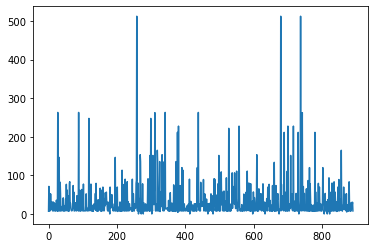

In [55]:
plt.plot(titanic.fare)
plt.show()

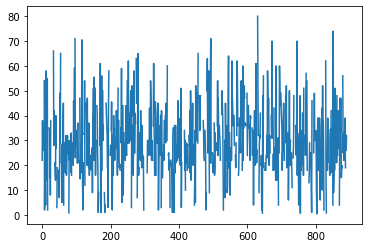

In [61]:
plt.plot(titanic.age)
plt.show()

In [66]:
# Number of passenger = Number of rows
len(titanic['fare'])

869

In [67]:
titanic.shape

(869, 15)

(0.0, 300.0)

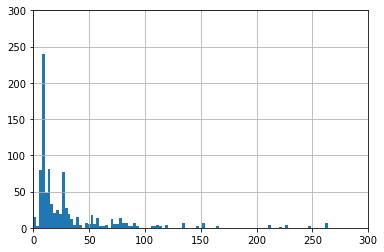

In [57]:
# Historgram
titanic.fare.hist(bins = 200) # try different numbers of bins
plt.xlim(0,300) # setting limit on x-axis
plt.ylim(0,300) # setting limit on y-axis

(0.0, 300.0)

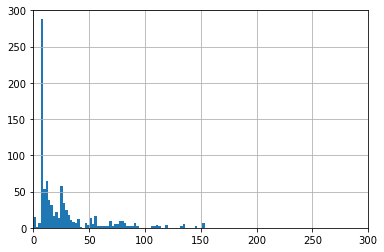

In [70]:
titanic.fare.hist(bins = 70) # try different numbers of bins
plt.xlim(0,300) # setting limit on x-axis
plt.ylim(0,300) # setting limit on y-axis

(0.0, 600.0)

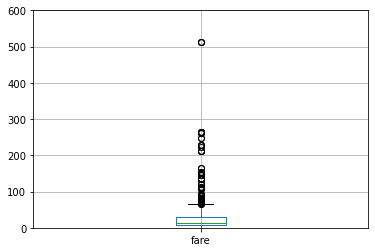

In [58]:
# Box plot
titanic.boxplot(column = 'fare')
plt.ylim(0, 600) # setting limit on y-axis

(0.0, 600.0)

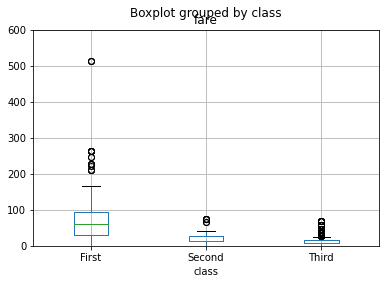

In [59]:
titanic.boxplot(column = 'fare', by = 'class')
plt.ylim(0, 600)

(0.0, 600.0)

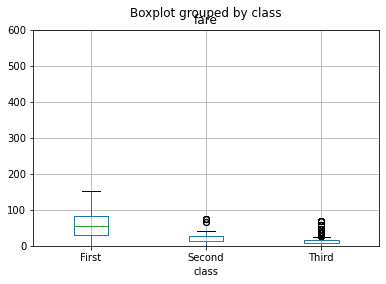

In [60]:
filt = ~((titanic['class'] == 'First') & (titanic['fare'] > 160))
titanic = titanic[filt]
titanic.boxplot(column = 'fare', by = 'class')
plt.ylim(0, 600)

(0.0, 50.0)

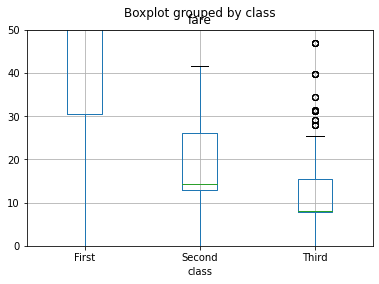

In [71]:
filt = ~((titanic['class'] == 'First') & (titanic['fare'] > 160))
titanic = titanic[filt]
titanic.boxplot(column = 'fare', by = 'class')
plt.ylim(0, 50)

In [72]:
# Bar Chart
fun_child_adult = {'age':{lambda x: sum(e<18 for e in x), lambda x: sum(e>=18 for e in x)}}
groupbyClass2 = titanic.groupby('class').agg(fun_child_adult)
groupbyClass2

age           
       <lambda_0> <lambda_1>
class                       
First         155         11
Second        150         23
Third         277         78

In [73]:
# The column names will be meaningless, so you may want to rename them.
groupbyClass2.rename(
columns = {
'<lambda_0>':'child count',
'<lambda_1>':'adult count'
},
inplace = True)
groupbyClass2

age            
       child count adult count
class                         
First          155          11
Second         150          23
Third          277          78

In [77]:
groupbyClass2 = groupbyClass2.reset_index()
groupbyClass2.columns = groupbyClass2.columns.droplevel(0)
groupbyClass2.rename(columns = {'':'class'},inplace = True)
groupbyClass2

,class,class,child count,adult count
0,0,First,155,11
1,1,Second,150,23
2,2,Third,277,78


ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of ticklabels (2).

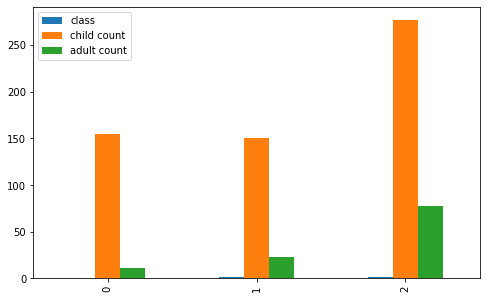

In [79]:
ax=groupbyClass2.plot.bar(figsize=(8,5))
# figsize sets size of plot
ax.set_xticklabels(groupbyClass2['class'],rotation=45)
# use values of column 'class' as the x axis labels. Remove this line
# of code to see what will happen if we do not have this line
plt.xlabel('Ticket Class')
# setting a label for x axis
plt.ylabel('Number of Passengers(child or adult)')
# Setting a label for y axis
plt.title('Passengers ticket class based on their adulthood')
# Setting the title of chart

In [85]:
# Pie Chart? MIA
# jkjk
groupbyClass2['child count']

0    155
1    150
2    277
Name: child count, dtype: int64

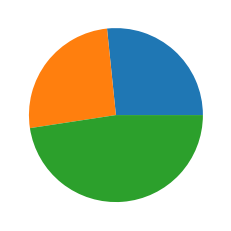

In [86]:
plt.pie(groupbyClass2['child count'])
plt.show()

In [82]:
# Scatter Plot
df = pd.DataFrame({
'Name' :
['Mike','Aaron','Brad','Steve','George','Mitchell','Shaun','Glenn','Pat','Robert','David'],
'Age' : [39,28,44,25,32,33,31,26,22,25,28],
'Runs' :[1310,662,1403,828,672,1140,655,1040,557,1030,1140]
})
df

,Name,Age,Runs
0,Mike,39,1310
1,Aaron,28,662
2,Brad,44,1403
3,Steve,25,828
4,George,32,672
5,Mitchell,33,1140
6,Shaun,31,655
7,Glenn,26,1040
8,Pat,22,557
9,Robert,25,1030


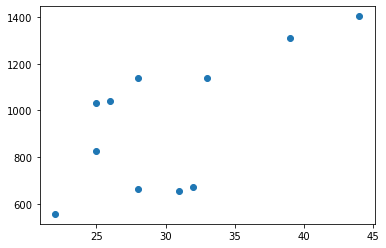

In [83]:
plt.scatter(df['Age'], df['Runs'])
plt.show()